In [3]:
pip install mne

  Using cached mne-1.10.1-py3-none-any.whl.metadata (20 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached matplotlib-3.10.5-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp312-cp312-macosx_10_13_x86_64.whl.metadata (62 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached scipy-1.16.1-cp312-cp312-macosx_10_14_x86_64.whl.metadata (61 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached mne-1.10.1-py3-none-an

In [2]:
import mne

In [9]:
# import and load dataset
sample_data_folder = mne.datasets.sample.data_path()
raw_file = sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_raw.fif'

raw = mne.io.read_raw_fif(raw_file, preload=True)
raw.pick_types(meg=False, eeg=True, stim=True, eog=True)
raw.filter(1., 40., fir_design="firwin")

Opening raw data file /Users/argus/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 s)



<Raw | sample_audvis_raw.fif, 69 x 166800 (277.7 s), ~90.8 MiB, data loaded>

In [10]:
#epoching

In [11]:
events = mne.find_events(raw,stim_channel="STI 014")
event_id = {'visual/left': 3, 'visual/right': 4}

epochs = mne.Epochs(raw, events, event_id,
                    tmin=-0.2, tmax=0.5,
                    baseline=(None, 0),
                    preload=True)


Finding events on: STI 014
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
144 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 421 original time points ...
0 bad epochs dropped


In [12]:
#to compute evoked responses

evoked_left = epochs["visual/left"].average()  
evoked_right = epochs["visual/right"].average()

In [13]:
import numpy as np

In [14]:
times= np.linspace(0.05, 0.25, 5)

In [15]:
import matplotlib.pyplot as plt
from pathlib import Path

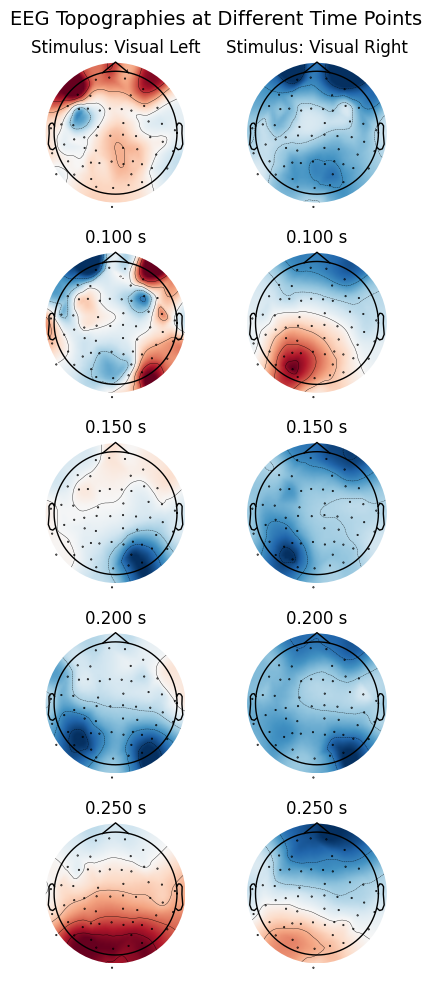

In [16]:
frames = []

fig, axes = plt.subplots(len(times), 2, figsize=(6, 10))

for i, t in enumerate(times):
    evoked_left.plot_topomap(times=t, ch_type='eeg',
                             axes=axes[i, 0], show=False,
                             time_unit='s',
                             colorbar=False)
    evoked_right.plot_topomap(times=t, ch_type='eeg',
                              axes=axes[i, 1], show=False,
                              time_unit='s',
                              colorbar=False)



axes[0, 0].set_title("Stimulus: Visual Left")
axes[0, 1].set_title("Stimulus: Visual Right")
fig.suptitle("EEG Topographies at Different Time Points", fontsize=14)




plt.tight_layout()
plt.savefig("frame.png")   # save one figure

plt.tight_layout()
plt.show()

In [17]:
import imageio

In [18]:
images = []
for t in times:
    fname = f"frame_{t:.3f}.png"
    # save each time point again as separate frame
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    evoked_left.plot_topomap(times=t, ch_type='eeg', axes=axes[0], show=False, time_unit='s', colorbar=False)
    evoked_right.plot_topomap(times=t, ch_type='eeg', axes=axes[1], show=False, time_unit='s', colorbar=False)
    axes[0].set_title("Stimulus: Visual Left")
    axes[1].set_title("Stimulus: Visual Right")
    fig.suptitle(f"EEG Topographies at {t:.3f} s", fontsize=14)
    plt.tight_layout()
    fig.savefig(fname)
    plt.close(fig)
    images.append(imageio.imread(fname))

# make gif
imageio.mimsave("topomap_animation.gif", images, duration=10, loop=5)

/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_2797/1076063425.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))
/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_2797/1076063425.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))
/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_2797/1076063425.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) us

In [20]:

gif_path = "topomap_animation.gif"
video_path = "topomap_animation.mp4"


gif = imageio.mimread(gif_path)


frames = [np.asarray(frame)[..., :3] for frame in gif]


fps = len(frames) / 10.0


imageio.mimsave(video_path, frames, fps=fps, codec="libx264")